In [4]:
# !pip install ultralytics

In [5]:
# !pip install labelme2yolo

In [6]:
# !pip install opencv-python-headless

In [27]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image
%matplotlib inline

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile
import csv
from tqdm import tqdm

In [28]:
# !tar -xf training_data_3.tar

In [ ]:
!labelme2yolo --json_dir ./training_data_3/

In [10]:
def copy_files(source_dir, dest_dir):
    for filename in tqdm(os.listdir(source_dir)):
        if os.path.isfile(os.path.join(source_dir, filename)):
            source_path = os.path.join(source_dir, filename)
            destination_path = os.path.join(dest_dir, filename)
            shutil.copy2(source_path, destination_path)

In [11]:
#copy images
source_train = os.getcwd() + '/training_data_3/YOLODataset/images/train'
source_val = os.getcwd() + '/training_data_3/YOLODataset/images/val'

train_dir = os.getcwd() + '/training_data_3/YOLODataset/datasets/train'
val_dir = os.getcwd() + '/training_data_3/YOLODataset/datasets/val'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 18/18 [00:00<00:00, 1544.17it/s]


In [12]:
#copy labels
source_train = os.getcwd() + '/training_data_3/YOLODataset/labels/train'
source_val = os.getcwd() + '/training_data_3/YOLODataset/labels/val'
copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 18/18 [00:00<00:00, 5316.35it/s]


In [13]:
#Loading the model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 167MB/s]


In [14]:
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [15]:
#changing yaml directory links
with open(os.getcwd()+'/training_data_3/YOLODataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
lines[0] = 'train: ./datasets/train' + '\n'
lines[1] = 'val: ./datasets/val' + '\n'
with open(os.getcwd()+'/training_data_3/YOLODataset/dataset.yaml', 'w') as file:
    file.writelines(lines)

In [16]:
# Train the model on the dataset for recommended initial 300 epochs
all_data_yaml = os.getcwd()+'/training_data_3/YOLODataset/dataset.yaml'
results = model.train(data=all_data_yaml, epochs=300, imgsz=512)

Ultralytics YOLOv8.1.19 🚀 Python-3.11.4 torch-2.2.1+cu121 CPU (Intel Xeon Platinum 8370C 2.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/training_data_3/YOLODataset/dataset.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/training_data_3/YOLODataset/datasets/train... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<00:00, 485.68it/s]

train: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/training_data_3/YOLODataset/datasets/train.cache



val: Scanning /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/training_data_3/YOLODataset/datasets/val... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 892.94it/s]

val: New cache created: /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/training_data_3/YOLODataset/datasets/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300         0G      2.408      4.171      1.911        327        512: 100%|██████████| 5/5 [00:21<00:00,  4.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         18        370     0.0044      0.214     0.0114    0.00385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300         0G      2.123      4.073       1.69        400        512: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         18        370     0.0046      0.214     0.0177    0.00843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300         0G      1.865      3.785      1.534        267        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        370    0.00552      0.232     0.0276      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300         0G      1.839      3.249      1.451        269        512: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         18        370    0.00775      0.243     0.0586     0.0222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300         0G      1.857      2.895      1.407        292        512: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        370     0.0334      0.422      0.192     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300         0G      1.845      2.512      1.383        327        512: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.51s/it]

                   all         18        370       0.86      0.117      0.224      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300         0G      1.825      2.219      1.358        308        512: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        370      0.935      0.122      0.222     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300         0G      1.859      2.095       1.38        271        512: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         18        370       0.57      0.164      0.225      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300         0G       1.85      2.017      1.392        434        512: 100%|██████████| 5/5 [00:18<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         18        370      0.836      0.187      0.217     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300         0G      1.841      1.992      1.336        389        512: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all         18        370      0.481        0.3      0.243      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300         0G      1.808        1.9      1.341        380        512: 100%|██████████| 5/5 [00:19<00:00,  3.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18        370      0.541      0.255      0.238      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300         0G      1.817       1.92      1.351        248        512: 100%|██████████| 5/5 [00:20<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all         18        370      0.459      0.264      0.225      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300         0G      1.807      1.703      1.342        289        512: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         18        370      0.437      0.356      0.234      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300         0G      1.783        1.7      1.349        355        512: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         18        370      0.438      0.249      0.217     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300         0G      1.742      1.645      1.288        429        512: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        370      0.215        0.4       0.21      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300         0G      1.779      1.643      1.314        289        512: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         18        370      0.183      0.378      0.235      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300         0G      1.754      1.592      1.344        239        512: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all         18        370      0.194      0.524       0.29      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300         0G      1.759      1.655      1.342        419        512: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         18        370      0.479      0.392      0.297      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300         0G      1.717      1.493        1.3        378        512: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         18        370      0.518      0.322      0.296      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300         0G      1.731      1.562      1.352        345        512: 100%|██████████| 5/5 [00:18<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         18        370       0.27      0.468      0.325      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300         0G      1.808      1.555      1.365        199        512: 100%|██████████| 5/5 [00:18<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        370      0.252      0.527      0.333       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300         0G       1.77      1.522      1.318        367        512: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.47s/it]

                   all         18        370      0.292       0.41      0.328      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300         0G      1.736      1.448      1.316        358        512: 100%|██████████| 5/5 [00:17<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

                   all         18        370      0.554      0.368      0.315      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300         0G      1.706      1.433      1.273        372        512: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         18        370      0.263      0.499      0.329      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300         0G      1.727      1.545      1.337        422        512: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all         18        370      0.291      0.397      0.309      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300         0G      1.675      1.389      1.315        421        512: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all         18        370      0.243      0.323      0.256      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300         0G       1.75      1.494      1.339        270        512: 100%|██████████| 5/5 [00:18<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.254      0.325      0.254      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300         0G      1.657      1.407      1.305        288        512: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.246      0.378      0.293      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300         0G      1.647      1.426      1.262        259        512: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        370      0.236      0.413      0.322      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300         0G      1.638      1.399      1.303        220        512: 100%|██████████| 5/5 [00:16<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.75s/it]

                   all         18        370       0.58       0.34      0.352       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300         0G      1.632      1.389      1.297        260        512: 100%|██████████| 5/5 [00:15<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

                   all         18        370      0.677      0.294      0.359      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300         0G      1.631      1.364      1.317        349        512: 100%|██████████| 5/5 [00:18<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]

                   all         18        370      0.553      0.313      0.348      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300         0G       1.62      1.305      1.277        318        512: 100%|██████████| 5/5 [00:18<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         18        370      0.533      0.324      0.326      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300         0G      1.589      1.305      1.278        292        512: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        370      0.302      0.424      0.305       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300         0G      1.641      1.393      1.266        350        512: 100%|██████████| 5/5 [00:20<00:00,  4.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all         18        370      0.283      0.426      0.283       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300         0G       1.62      1.369       1.25        258        512: 100%|██████████| 5/5 [00:17<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all         18        370      0.211       0.47      0.212      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300         0G      1.631       1.35      1.285        314        512: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         18        370      0.219       0.42      0.236      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300         0G      1.592      1.309      1.272        303        512: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        370      0.191      0.444      0.279      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300         0G      1.602      1.294      1.278        590        512: 100%|██████████| 5/5 [00:18<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         18        370      0.509      0.253      0.303       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300         0G      1.642      1.341      1.253        344        512: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all         18        370       0.51      0.267      0.293      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300         0G      1.594      1.221       1.23        389        512: 100%|██████████| 5/5 [00:18<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all         18        370      0.249      0.463      0.313      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300         0G       1.61      1.343      1.302        350        512: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         18        370      0.284      0.439      0.329      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300         0G      1.629      1.314      1.268        283        512: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         18        370       0.35       0.34      0.343      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300         0G      1.586      1.303      1.235        301        512: 100%|██████████| 5/5 [00:17<00:00,  3.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.297      0.436      0.326      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300         0G       1.59       1.29      1.251        550        512: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         18        370       0.25      0.442      0.327      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300         0G      1.569      1.259      1.215        241        512: 100%|██████████| 5/5 [00:18<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all         18        370      0.275       0.42      0.343      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300         0G      1.579      1.224      1.251        378        512: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all         18        370      0.317      0.416      0.373      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300         0G      1.647      1.231      1.303        295        512: 100%|██████████| 5/5 [00:16<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         18        370      0.364      0.407      0.425      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300         0G      1.681      1.237      1.306        374        512: 100%|██████████| 5/5 [00:17<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.281      0.453      0.417      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300         0G      1.573      1.187      1.255        416        512: 100%|██████████| 5/5 [00:17<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all         18        370      0.294      0.432      0.382      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300         0G      1.584      1.269      1.266        478        512: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         18        370      0.318      0.438      0.356      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300         0G      1.553      1.247      1.238        267        512: 100%|██████████| 5/5 [00:16<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         18        370      0.271      0.418      0.317      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300         0G      1.565      1.273      1.246        298        512: 100%|██████████| 5/5 [00:17<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all         18        370      0.306      0.431      0.316      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300         0G      1.574       1.28      1.278        388        512: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.387      0.438       0.35      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300         0G      1.588      1.295      1.275        381        512: 100%|██████████| 5/5 [00:16<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         18        370      0.361      0.449      0.378      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300         0G      1.549      1.218      1.243        314        512: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         18        370       0.35      0.472      0.385      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300         0G      1.568      1.272      1.267        243        512: 100%|██████████| 5/5 [00:17<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        370       0.33      0.442       0.36      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300         0G      1.533       1.21      1.192        376        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.299      0.464      0.323      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300         0G      1.589      1.307      1.262        350        512: 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         18        370       0.29       0.45      0.298      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300         0G      1.564      1.236      1.232        320        512: 100%|██████████| 5/5 [00:18<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.12s/it]

                   all         18        370      0.324      0.434      0.346      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300         0G      1.558      1.243      1.245        437        512: 100%|██████████| 5/5 [00:17<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all         18        370       0.31      0.494      0.381      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300         0G      1.561      1.216      1.228        365        512: 100%|██████████| 5/5 [00:18<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         18        370       0.63       0.34      0.368      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300         0G      1.539      1.212      1.285        254        512: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        370      0.628      0.342      0.354      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300         0G      1.586      1.208      1.224        515        512: 100%|██████████| 5/5 [00:17<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         18        370      0.295      0.375      0.313      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300         0G       1.54       1.18      1.212        350        512: 100%|██████████| 5/5 [00:18<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         18        370      0.302       0.41      0.292      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300         0G      1.521      1.128      1.214        334        512: 100%|██████████| 5/5 [00:20<00:00,  4.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         18        370       0.27      0.426       0.27       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300         0G       1.52      1.202      1.227        414        512: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all         18        370      0.289      0.439      0.295      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300         0G       1.51      1.255      1.243        349        512: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         18        370      0.325      0.476      0.363      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300         0G      1.523      1.223      1.237        291        512: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

                   all         18        370       0.62      0.369      0.391      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300         0G      1.509      1.134      1.243        375        512: 100%|██████████| 5/5 [00:18<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.315      0.449      0.367      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300         0G      1.523      1.165      1.221        418        512: 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18        370      0.246      0.443      0.328      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300         0G      1.527      1.107      1.244        439        512: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         18        370      0.261      0.417      0.317      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300         0G      1.477      1.157      1.224        339        512: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        370      0.294      0.438      0.326      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300         0G      1.476      1.074      1.188        396        512: 100%|██████████| 5/5 [00:19<00:00,  3.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         18        370      0.304      0.464       0.34      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300         0G      1.476      1.135      1.195        469        512: 100%|██████████| 5/5 [00:18<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all         18        370      0.299      0.396      0.316       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300         0G       1.48       1.13      1.202        275        512: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.274      0.427      0.299      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300         0G      1.495      1.119      1.208        339        512: 100%|██████████| 5/5 [00:16<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all         18        370        0.3      0.464      0.316      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300         0G      1.492       1.18      1.228        229        512: 100%|██████████| 5/5 [00:15<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         18        370      0.311      0.462      0.321      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300         0G      1.486      1.072      1.217        360        512: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all         18        370      0.329      0.437      0.334      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300         0G       1.48      1.075      1.223        375        512: 100%|██████████| 5/5 [00:18<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         18        370      0.307       0.39      0.311      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300         0G      1.482      1.092      1.208        399        512: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]

                   all         18        370      0.288      0.377      0.297      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300         0G      1.489      1.199      1.253        151        512: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         18        370      0.276      0.392      0.294      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300         0G       1.46      1.109      1.211        397        512: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         18        370      0.286      0.385      0.282      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300         0G       1.48      1.072      1.198        385        512: 100%|██████████| 5/5 [00:19<00:00,  3.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

                   all         18        370      0.266      0.393      0.242      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300         0G      1.461      1.071      1.196        346        512: 100%|██████████| 5/5 [00:16<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all         18        370      0.256      0.405      0.262      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300         0G       1.44       1.07      1.207        270        512: 100%|██████████| 5/5 [00:19<00:00,  3.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all         18        370       0.32      0.338      0.284      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300         0G      1.461      1.057      1.198        320        512: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all         18        370      0.365      0.308      0.301      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300         0G      1.466      1.094      1.175        372        512: 100%|██████████| 5/5 [00:19<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         18        370      0.267      0.399      0.308      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300         0G      1.435      1.058      1.175        463        512: 100%|██████████| 5/5 [00:19<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         18        370      0.351      0.359      0.347      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300         0G      1.422      1.024      1.166        311        512: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         18        370       0.36      0.405      0.374      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300         0G      1.393       1.01      1.193        384        512: 100%|██████████| 5/5 [00:18<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         18        370      0.381      0.437      0.377      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300         0G      1.443       1.04      1.187        361        512: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.469       0.38      0.375      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300         0G       1.42       1.06      1.161        272        512: 100%|██████████| 5/5 [00:16<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all         18        370      0.434      0.393      0.363      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300         0G      1.478      1.093      1.213        230        512: 100%|██████████| 5/5 [00:17<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.79s/it]

                   all         18        370      0.357      0.372      0.345      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300         0G      1.426     0.9985      1.159        480        512: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         18        370      0.356       0.35      0.302       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300         0G      1.446      1.139      1.209        257        512: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all         18        370      0.283      0.358      0.279      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300         0G      1.441      1.035      1.171        466        512: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

                   all         18        370      0.319      0.348      0.318      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300         0G      1.453      1.069      1.224        441        512: 100%|██████████| 5/5 [00:16<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all         18        370      0.278      0.507      0.362      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300         0G       1.45      1.121      1.208        338        512: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.292      0.518       0.38      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300         0G      1.398       1.03      1.173        414        512: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.347      0.524      0.377      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300         0G      1.427      1.065      1.215        260        512: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         18        370      0.333      0.494      0.401      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300         0G      1.395      1.029      1.159        492        512: 100%|██████████| 5/5 [00:16<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.316      0.457        0.4      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300         0G      1.414     0.9862      1.163        307        512: 100%|██████████| 5/5 [00:17<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         18        370      0.415      0.372      0.402       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300         0G      1.455       1.03      1.212        337        512: 100%|██████████| 5/5 [00:15<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         18        370      0.262      0.447      0.349      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300         0G       1.46      1.172      1.239        434        512: 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all         18        370      0.329      0.412       0.34      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300         0G      1.385      1.039      1.206        314        512: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         18        370      0.351      0.446      0.354      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300         0G      1.441      1.025      1.226        345        512: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]

                   all         18        370      0.342      0.452       0.34      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300         0G      1.396     0.9748       1.18        401        512: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]

                   all         18        370      0.233      0.455      0.247      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300         0G      1.385      1.024      1.201        299        512: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all         18        370      0.296       0.42       0.29      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300         0G      1.366     0.9516      1.164        386        512: 100%|██████████| 5/5 [00:18<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         18        370      0.259      0.406      0.304       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300         0G      1.393     0.9628      1.169        411        512: 100%|██████████| 5/5 [00:19<00:00,  3.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.327      0.356      0.301      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300         0G      1.368     0.9667      1.151        321        512: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         18        370      0.308      0.432      0.299       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300         0G      1.377     0.9895       1.18        268        512: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all         18        370      0.328      0.425      0.296      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300         0G      1.392     0.9714      1.165        316        512: 100%|██████████| 5/5 [00:17<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.327      0.442      0.288      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300         0G      1.379     0.9616      1.161        347        512: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         18        370      0.342      0.441      0.316      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300         0G       1.38     0.9591      1.182        288        512: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18        370      0.342      0.452      0.337      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300         0G      1.372     0.9582      1.174        348        512: 100%|██████████| 5/5 [00:17<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]

                   all         18        370      0.334      0.491      0.353      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300         0G      1.375     0.9875      1.165        340        512: 100%|██████████| 5/5 [00:17<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all         18        370      0.396      0.524      0.386      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300         0G      1.352     0.9291      1.171        436        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.397       0.48      0.394      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300         0G      1.339     0.9229       1.15        284        512: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         18        370      0.425      0.467      0.397      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300         0G      1.346     0.8924       1.13        511        512: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         18        370      0.385      0.486      0.391      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300         0G      1.356     0.9668      1.193        284        512: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all         18        370      0.375      0.471      0.377      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300         0G      1.324     0.9245      1.143        457        512: 100%|██████████| 5/5 [00:19<00:00,  3.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         18        370      0.376      0.403       0.36      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300         0G      1.306     0.8716       1.13        364        512: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         18        370      0.327      0.525      0.362      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300         0G      1.337     0.9026      1.156        407        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         18        370      0.405      0.388      0.364      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300         0G      1.322     0.8939      1.166        384        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all         18        370      0.391      0.418      0.362      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300         0G      1.313     0.9188      1.174        393        512: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         18        370      0.381      0.383      0.338      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300         0G      1.338     0.9521      1.185        220        512: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]

                   all         18        370      0.375      0.387      0.349      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300         0G      1.303     0.9206      1.157        281        512: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all         18        370      0.423      0.357      0.375      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300         0G      1.329     0.9637      1.182        198        512: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all         18        370      0.353      0.434      0.383      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300         0G      1.317     0.8741      1.133        365        512: 100%|██████████| 5/5 [00:18<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all         18        370      0.427      0.401      0.368       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300         0G      1.355      0.938      1.174        236        512: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        370      0.354      0.472       0.37      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300         0G      1.318     0.9317      1.199        298        512: 100%|██████████| 5/5 [00:17<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all         18        370      0.355      0.479      0.379      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300         0G      1.345     0.8739      1.137        420        512: 100%|██████████| 5/5 [00:15<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         18        370      0.376      0.394      0.381      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300         0G      1.335     0.8961      1.129        520        512: 100%|██████████| 5/5 [00:17<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all         18        370      0.324      0.405       0.38      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300         0G      1.316     0.9045      1.167        426        512: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.70s/it]

                   all         18        370      0.338      0.427      0.384      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300         0G      1.344     0.9776      1.157        266        512: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         18        370      0.368      0.418      0.384      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300         0G      1.332     0.8891      1.157        431        512: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all         18        370      0.364      0.423      0.372      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300         0G      1.334     0.8681       1.12        395        512: 100%|██████████| 5/5 [00:18<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all         18        370      0.338      0.516      0.361      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300         0G      1.343     0.9105      1.179        446        512: 100%|██████████| 5/5 [00:16<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all         18        370      0.338      0.454      0.355      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300         0G      1.286     0.8815      1.139        303        512: 100%|██████████| 5/5 [00:17<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]

                   all         18        370      0.314      0.477      0.353      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300         0G      1.324     0.9223      1.192        489        512: 100%|██████████| 5/5 [00:17<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         18        370       0.34       0.46       0.37      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300         0G      1.278     0.8516       1.13        333        512: 100%|██████████| 5/5 [00:17<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all         18        370      0.375      0.341      0.366      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300         0G      1.313     0.8849      1.116        436        512: 100%|██████████| 5/5 [00:19<00:00,  3.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         18        370      0.329      0.395      0.352      0.174
Stopping training early as no improvement observed in last 100 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



149 epochs completed in 0.845 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.4 torch-2.2.1+cu121 CPU (Intel Xeon Platinum 8370C 2.80GHz)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


                   all         18        370      0.281      0.453      0.416        0.2
undamagedresidentialbuilding         18        272      0.637      0.912      0.853      0.441
damagedresidentialbuilding         18         47      0.225      0.302      0.162     0.0631
undamagedcommercialbuilding         18         34       0.24      0.588      0.484      0.242
damagedcommercialbuilding         18         17     0.0227     0.0107      0.164     0.0554
Speed: 0.6ms preprocess, 45.4ms inference, 0.0ms loss, 14.7ms postprocess per image
Results saved to runs/detect/train


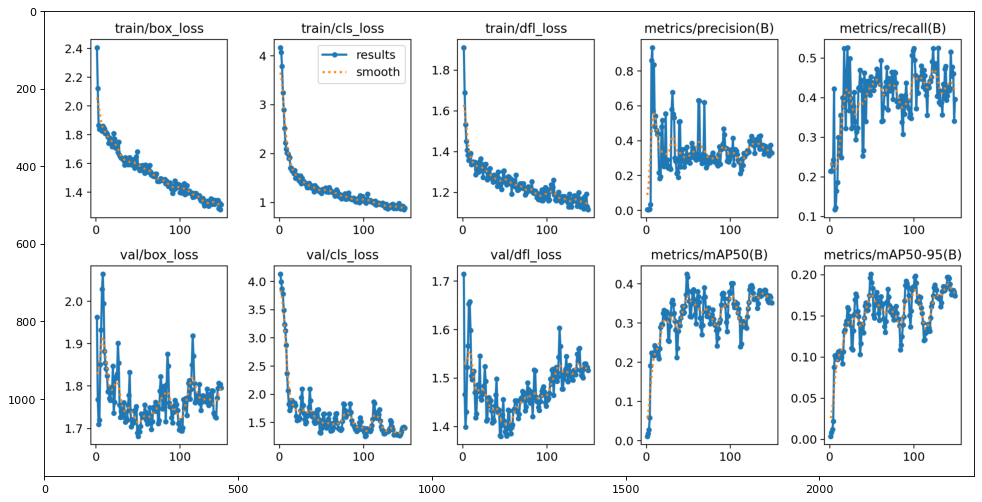

In [17]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('./runs/detect/train/results.png')   
# displaying the image 
plt.imshow(results) 

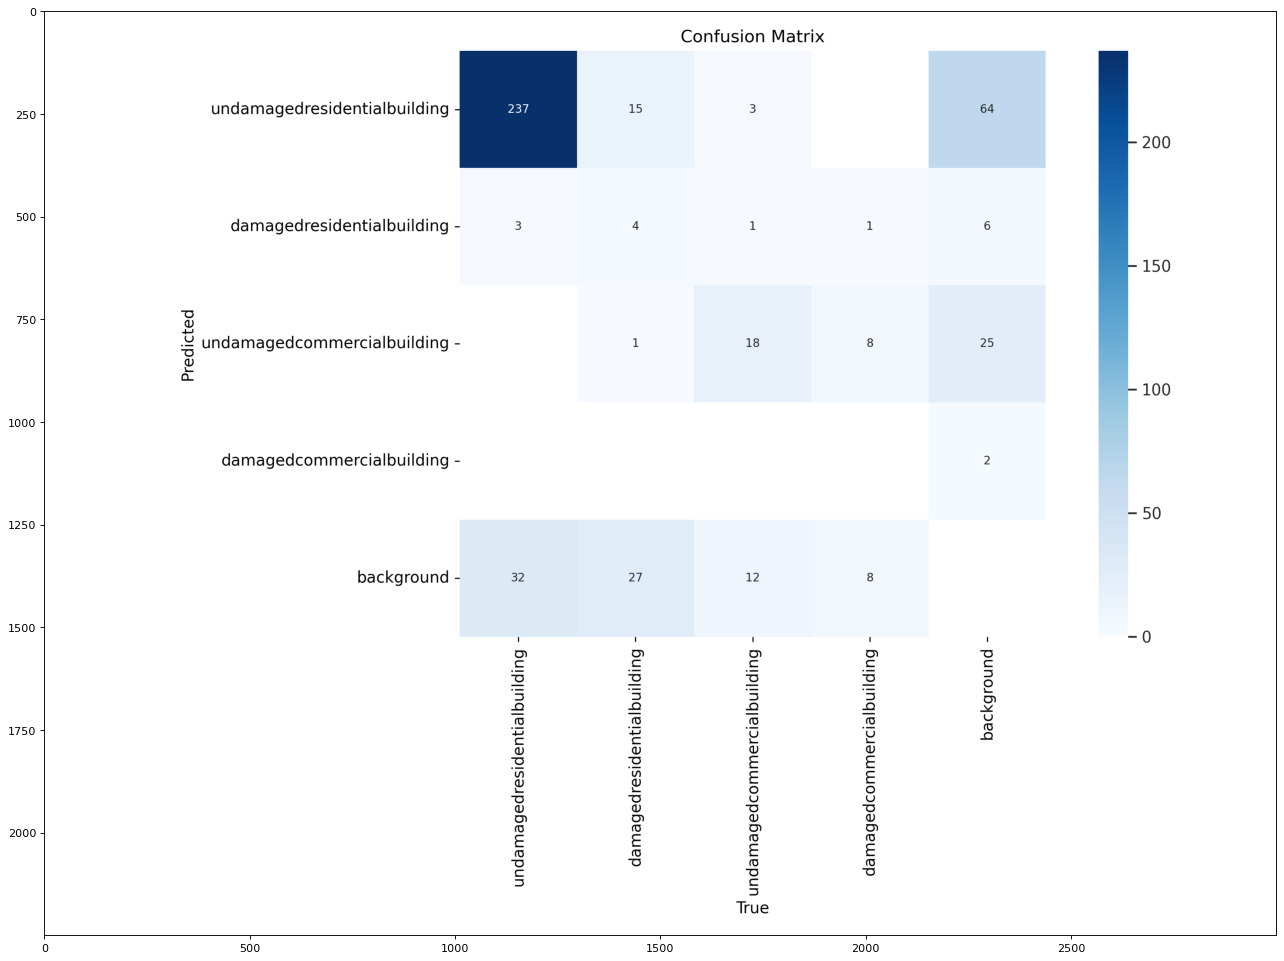

In [18]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('./runs/detect/train/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf)

In [19]:
# !cp -rf ./../model_development_2/challenge_1_submission_images/ ./challenge_1_submission_images

In [20]:
# Load the Model
model = YOLO('./runs/detect/train/weights/best.pt')

In [21]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedresidentialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/'
# Directory to store outputs
results_directory = './Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.numpy().tolist()
            clss_list = r.boxes.cls.numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")

challenge_1_submission_images/Validation_Post_Event_008.jpg
Making a prediction on  Validation_Post_Event_008.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/challenge_1_submission_images/Validation_Post_Event_008.jpg: 512x512 9 undamagedresidentialbuildings, 111.3ms
Speed: 1.2ms preprocess, 111.3ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Output files generated successfully.
challenge_1_submission_images/Validation_Post_Event_002.jpg
Making a prediction on  Validation_Post_Event_002.jpg

image 1/1 /home/jovyan/PlanetaryComputerExamples/EYOpenScience/model_development_3/challenge_1_submission_images/Validation_Post_Event_002.jpg: 512x512 6 undamagedresidentialbuildings, 2 undamagedcommercialbuildings, 68.4ms
Speed: 1.4ms preprocess, 68.4ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
2 l

In [22]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory ./Validation_Data_Results has been successfully zipped into submission.


In [23]:
!rm yolov8n.pt

In [24]:
!rm -rf runs

In [26]:
!rm -rf ./training_data_3/YOLODataset/